# yasse
This is a simple search engine project that is written in python. The code is written with modularity in mind, so that new features can be added with minimal hassle.

Here is an overview of the project outline:

## Modules

This project contains some modules that each tries to:
`Do one thing and do it well`

### [dataprocessor.py](https://github.com/MiliAxe/yasse/wiki/dataprocessor.py)
Responsible for extracting all the information needed from the raw data files.

### [searchengine.py](https://github.com/MiliAxe/yasse/wiki/searchengine.py)
Responsible for doing the required calculations for finding the most relevant sentences and documents.

### argparser.py
Responsible for defining the required CLI arguments for the program.

### jsonparser.py
Responsible for extracting the needed information for the test cases in the JSON file provided in the project.

### main.py
Does the necessary communication between modules to give the output needed.

In [1]:
# These are the paths to the documents that we will be using for the project
paths = [f"data/document_{index}.txt" for index in range(10000)]

## Features showcase

### Searching
You can search among files using the searchengine.py module.

In [2]:
from modules.searchengine import SearchEngine
from modules.dataprocessor import SentencePosition

# TF-IDF: 42s - 1m

In [3]:

se = SearchEngine(paths)
se.calculate_tf_idf_all_docs()
query = "Microsoft rba"

# Cosine Similarity: 7m 10s - 8m 11s

In [4]:
docs_cosinesimilarity = se.cosine_similarities_docs(query)

# result 0.5s

In [5]:
relevant_docs = sorted(
    docs_cosinesimilarity, key=lambda x: x[2], reverse=True
)
print(relevant_docs[0:10])
sentences_cosinesimilarity = se.cosine_similarities_doc_sentences(query, relevant_docs[0][0])
relevant_sentences = sorted(
    sentences_cosinesimilarity, key=lambda x: x[1], reverse=True
)

print(f"relevant sentence: {se.dp.sentence_at(SentencePosition(relevant_docs[0][0], relevant_sentences[0][0]))}")

[(0, 'data/document_0.txt', 0.11341355292287611), (8377, 'data/document_8377.txt', 0.06746875255250519), (5977, 'data/document_5977.txt', 0.035517288912100174), (8643, 'data/document_8643.txt', 0.029210486945931907), (1651, 'data/document_1651.txt', 0.027311878046009732), (6040, 'data/document_6040.txt', 0.024055214206745345), (9974, 'data/document_9974.txt', 0.01700415593545923), (7262, 'data/document_7262.txt', 0.01568188453250151), (7909, 'data/document_7909.txt', 0.011119799853235584), (6193, 'data/document_6193.txt', 0.010549358558326694)]
relevant sentence: rba recognized with the 2014 microsoft us regional partner of the ... by pr newswire. contract awarded for supply and support the. securitisations system used for risk management and analysis. 


### Visualization

Visualization can be easily done using the visualizer.py module

# Visuals using previous data 10s

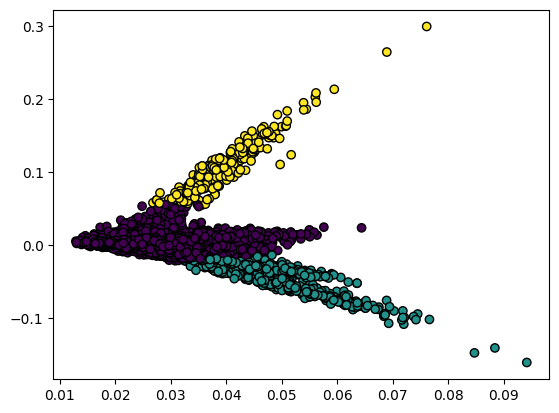

In [6]:
from modules.visualizer import Visualizer

cluster_count = 3

dvisualizer = Visualizer(se)
dvisualizer.compute_clusters(cluster_count)
dvisualizer.plot_clusters()